## Implement Ant colony optimization by solving the Traveling salesman problem using python Problem statement- A salesman needs to visit a set of cities exactly once and return to the original city. The task is to find the shortest possible route that the salesman can take to visit all the cities and return to the starting city.

Best path: [0, np.int64(9), np.int64(6), np.int64(8), np.int64(3), np.int64(7), np.int64(5), np.int64(4), np.int64(1), np.int64(2)]
Total distance: 338.60319112792934


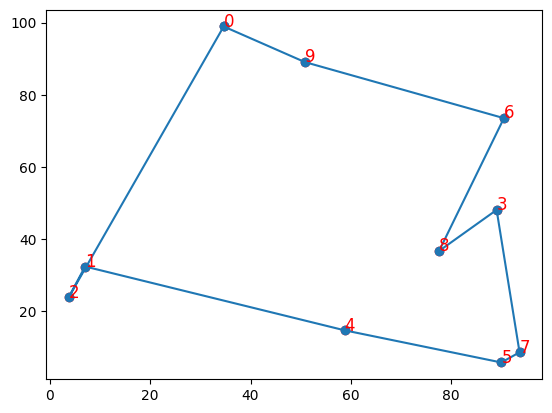

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Generate cities and distance matrix
def generate_cities(n): return np.random.rand(n, 2) * 100
def calculate_distances(cities): return np.linalg.norm(cities[:, np.newaxis] - cities, axis=2)

# Ant Colony Optimization
class ACO:
    def __init__(self, dist, ants=10, iter=100, alpha=1, beta=2, decay=0.5, q=100):
        self.dist, self.pheromone, self.ants, self.iter, self.alpha, self.beta, self.decay, self.q = dist, np.ones_like(dist) / len(dist), ants, iter, alpha, beta, decay, q

    def run(self):
        best_dist, best_path = float('inf'), None
        for _ in range(self.iter):
            all_paths = [self.gen_path() for _ in range(self.ants)]
            self.update_pheromone(all_paths)
            best = min(all_paths, key=lambda x: x[1])
            if best[1] < best_dist: best_dist, best_path = best[1], best[0]
        return best_path, best_dist

    def gen_path(self):
        path, visited = [0], {0}
        for _ in range(len(self.dist) - 1):
            prev = path[-1]
            next_city = self.select_city(prev, visited)
            path.append(next_city)
            visited.add(next_city)
        return path, sum(self.dist[path[i], path[i+1]] for i in range(len(path)-1)) + self.dist[path[-1], path[0]]

    def select_city(self, prev, visited):
        pheromone, dist = self.pheromone[prev] ** self.alpha, (1 / (self.dist[prev] + 1e-10)) ** self.beta
        pheromone[list(visited)] = 0
        prob = pheromone * dist
        return np.random.choice(range(len(self.dist)), p=prob / prob.sum())

    def update_pheromone(self, paths):
        self.pheromone *= self.decay
        for path, dist in paths:
            for i in range(len(path)-1): self.pheromone[path[i], path[i+1]] += self.q / dist

# Plot the path
def plot(cities, path):
    path = path + [path[0]]
    plt.plot(cities[path, 0], cities[path, 1], marker='o')
    plt.scatter(cities[:, 0], cities[:, 1], color='red')
    for i, (x, y) in enumerate(cities): plt.text(x, y, str(i), fontsize=12, color='red')
    plt.show()

# Run the Algorithm
if __name__ == "__main__":
    cities = generate_cities(10)
    dist = calculate_distances(cities)
    aco = ACO(dist)
    best_path, best_distance = aco.run()
    print("Best path:", best_path)
    print("Total distance:", best_distance)
    plot(cities, best_path)
